In [61]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
import plotly.express as px
import json
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from segregation.singlegroup import absolute_clustering, dissim, interaction,absolute_concentration
import geopandas as gpd
import plotly.io as pio
from shapely.geometry import Point, MultiPoint
from scipy.spatial.distance import cdist
from shapely.ops import transform
from functools import partial
import pyproj

## Predictives

In [62]:
italy=pd.read_csv("./predictives/preds_italy.csv")
morroco=pd.read_csv( "./predictives/preds_morroco.csv")
china=pd.read_csv( "./predictives/preds_china.csv")
ecuador=pd.read_csv( "./predictives/preds_ecuador.csv")
peru=pd.read_csv( "./predictives/preds_peru.csv")

In [63]:
italy.cusec=('0'+italy.cusec.astype(str)).astype(str)
morroco.cusec=('0'+morroco.cusec.astype(str)).astype(str)
china.cusec=('0'+china.cusec.astype(str)).astype(str)
ecuador.cusec=('0'+ecuador.cusec.astype(str)).astype(str)
peru.cusec=('0'+peru.cusec.astype(str)).astype(str)

Italy

In [64]:
mapping = gpd.read_file('./data/geography/cusecs/spain_comarcas.json')
mapping=mapping.merge(italy,  left_on='CUSEC', right_on='cusec', how='left')
mapping.pred_fixed=mapping.pred_fixed/mapping.census_total_pop*100
mapping.pred_fixed_icar=mapping.pred_fixed_icar/mapping.census_total_pop*100
mapping.pred_full=mapping.pred_full/mapping.census_total_pop*100
mapping.real=mapping.real/mapping.census_total_pop*100

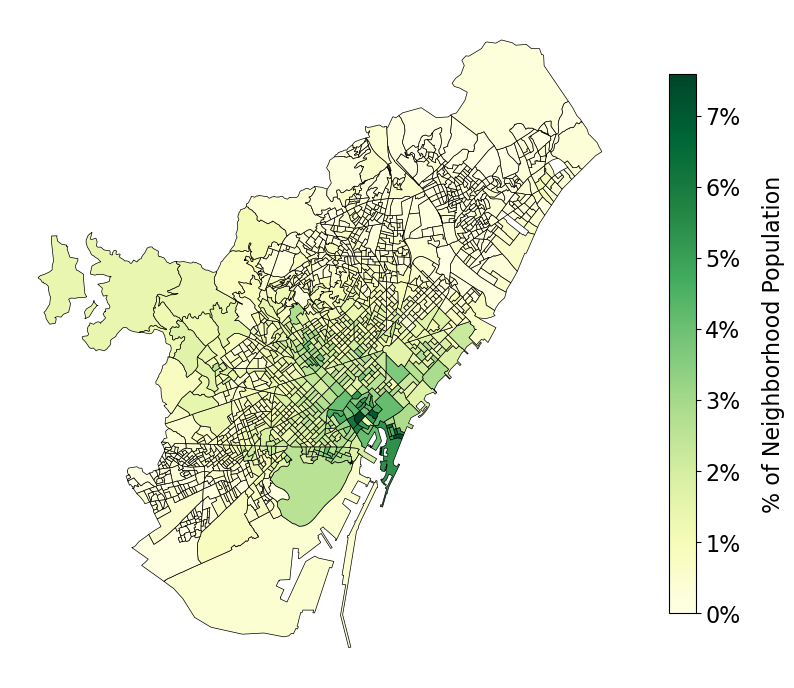

In [65]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='real', cmap='YlGn', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_italy_real.png', dpi=200, bbox_inches='tight')
plt.show()

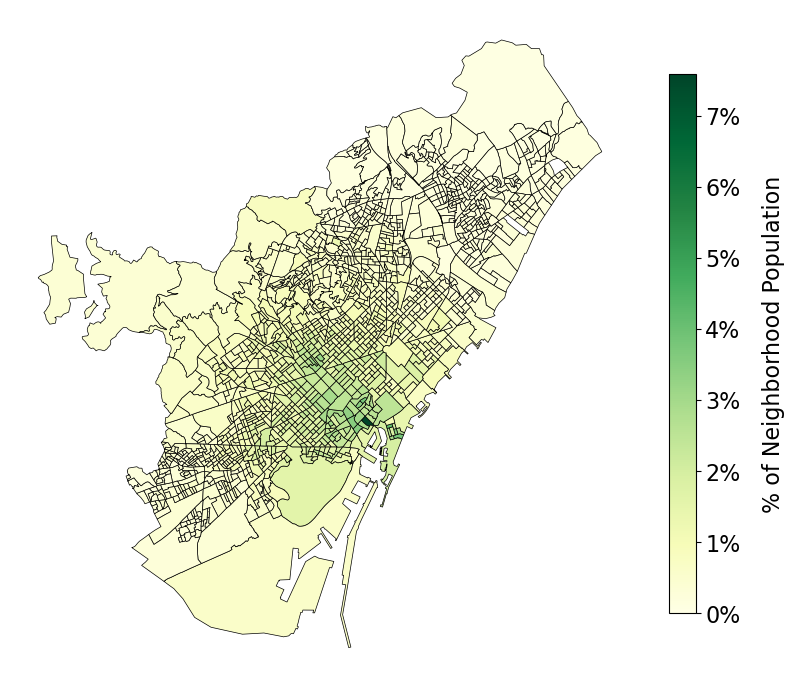

In [66]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='pred_fixed', cmap='YlGn', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_italy_fixed.png', dpi=200, bbox_inches='tight')
plt.show()

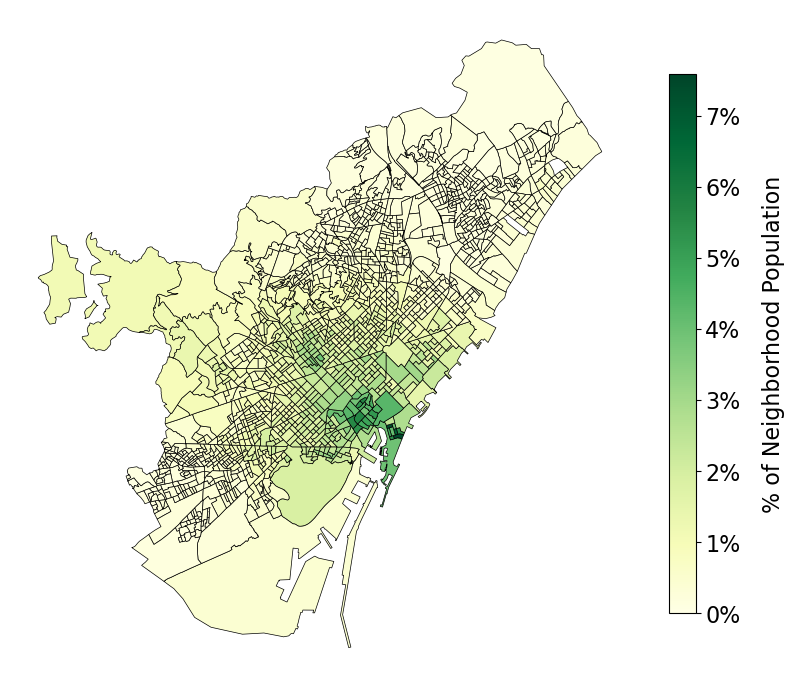

In [67]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='pred_fixed_icar', cmap='YlGn', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_italy_icar.png', dpi=200, bbox_inches='tight')
plt.show()

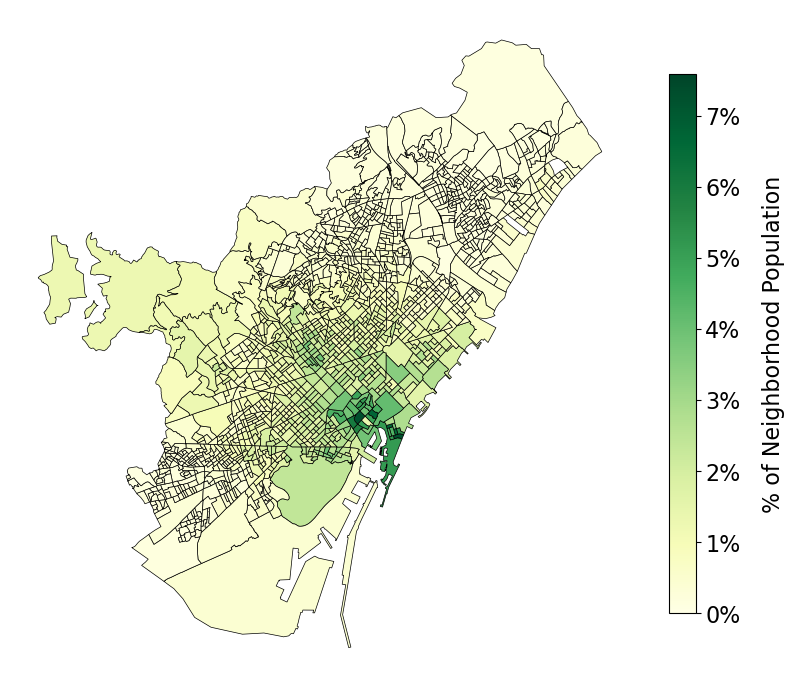

In [68]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='pred_full', cmap='YlGn', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_italy_full.png', dpi=200, bbox_inches='tight')
plt.show()

Ecuador

In [69]:
mapping = gpd.read_file('./data/geography/cusecs/spain_comarcas.json')
mapping=mapping.merge(ecuador,  left_on='CUSEC', right_on='cusec', how='left')
mapping.pred_fixed=mapping.pred_fixed/mapping.census_total_pop*100
mapping.pred_fixed_icar=mapping.pred_fixed_icar/mapping.census_total_pop*100
mapping.pred_full=mapping.pred_full/mapping.census_total_pop*100
mapping.real=mapping.real/mapping.census_total_pop*100

In [70]:
mapping.real.max()

11.936758893280633

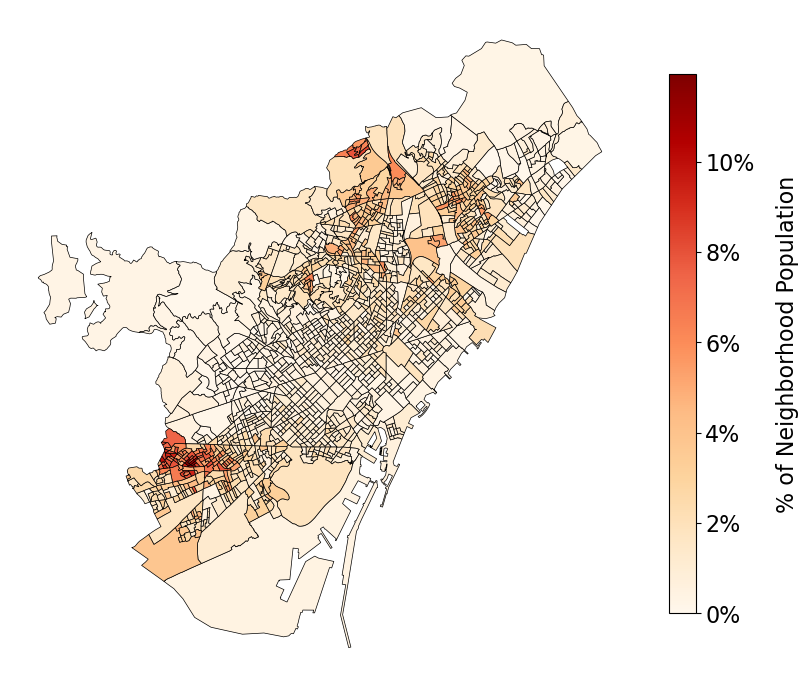

In [71]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='real', cmap='OrRd', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_ecuador_real.png', dpi=200, bbox_inches='tight')
plt.show()

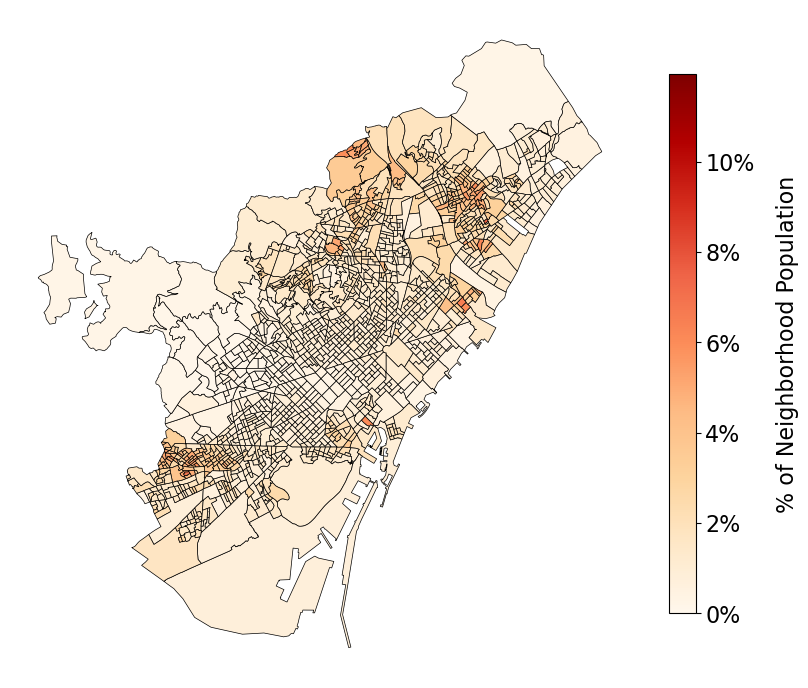

In [72]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='pred_fixed', cmap='OrRd', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_ecuador_fixed.png', dpi=200, bbox_inches='tight')
plt.show()

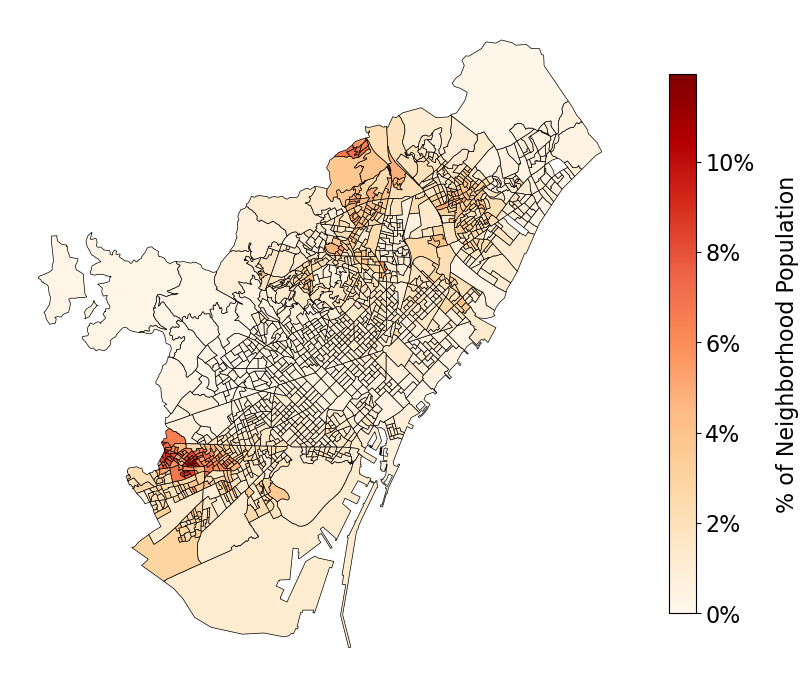

In [73]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='pred_fixed_icar', cmap='OrRd', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_ecuador_icar.png', dpi=200, bbox_inches='tight')
plt.show()

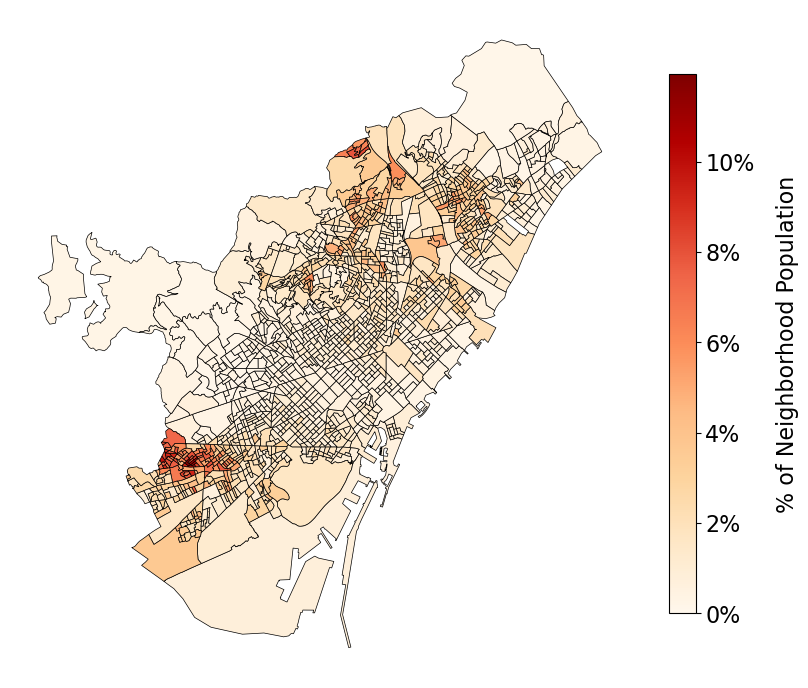

In [74]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='pred_full', cmap='OrRd', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_ecuador_full.png', dpi=200, bbox_inches='tight')
plt.show()

## Predictives - Madrid

In [82]:
ecuador=pd.read_csv( "./predictives/preds_ecuador_madrid.csv")

Ecuador

In [83]:
ecuador.cusec=ecuador.cusec.astype(str)

In [84]:
mapping = gpd.read_file('./data/geography/cusecs/spain_comarcas_madrid.json')
mapping=mapping.merge(ecuador,  left_on='CUSEC', right_on='cusec', how='left')
mapping.pred_fixed=mapping.pred_fixed/mapping.census_total_pop*100
mapping.pred_fixed_icar=mapping.pred_fixed_icar/mapping.census_total_pop*100
mapping.pred_full=mapping.pred_full/mapping.census_total_pop*100
mapping.real=mapping.real/mapping.census_total_pop*100

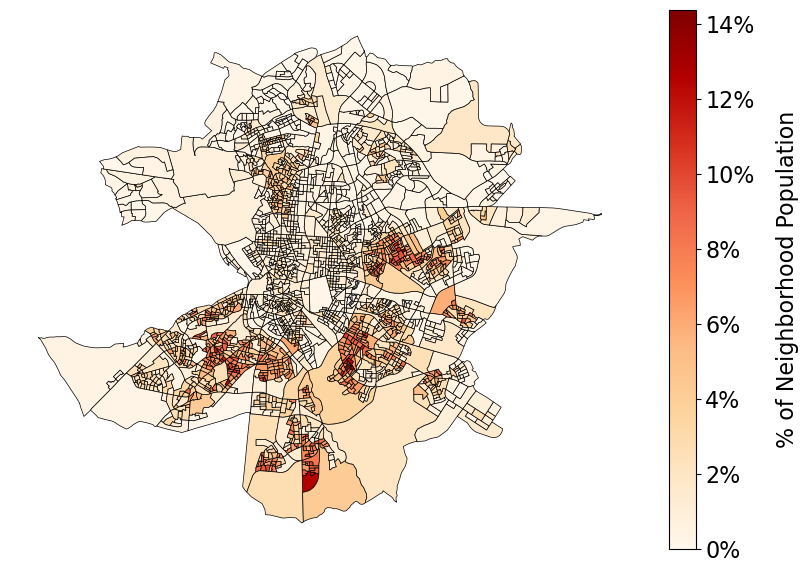

In [85]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='real', cmap='OrRd', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_ecuador_madrid_real.png', dpi=200, bbox_inches='tight')
plt.show()

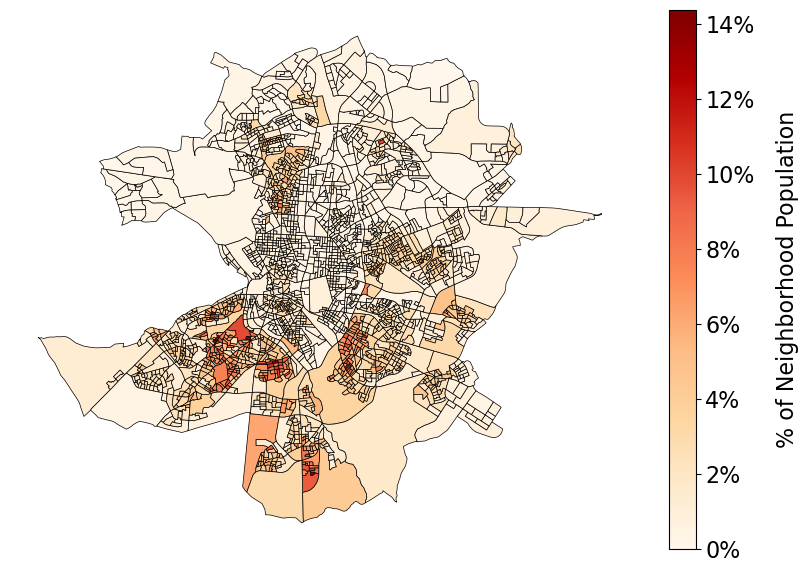

In [86]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='pred_fixed', cmap='OrRd', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_ecuador_madrid_fixed.png', dpi=200, bbox_inches='tight')
plt.show()

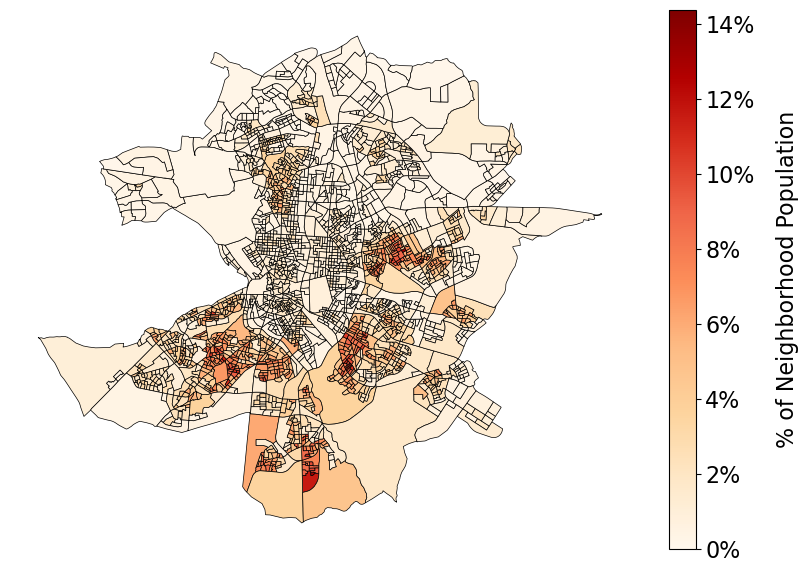

In [87]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='pred_fixed_icar', cmap='OrRd', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_ecuador_madrid_icar.png', dpi=200, bbox_inches='tight')
plt.show()

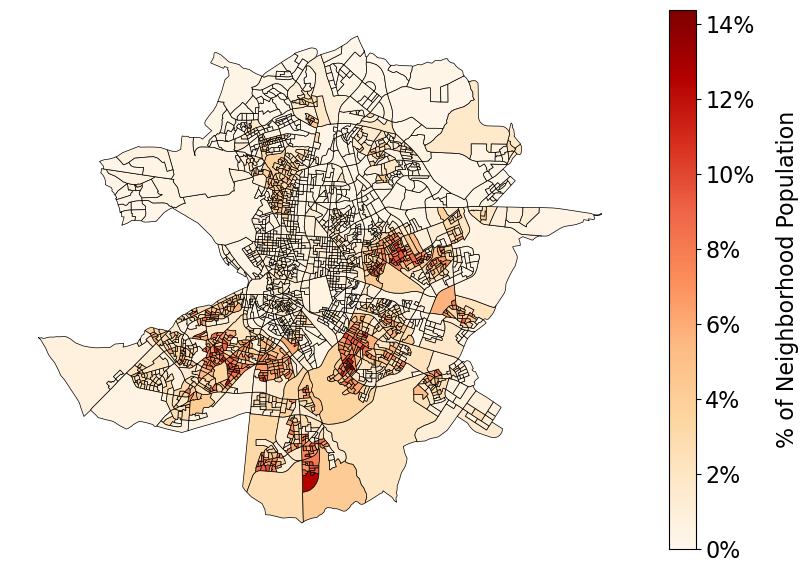

In [88]:
# Plot
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
mapping.plot(column='pred_full', cmap='OrRd', legend=False, ax=ax, edgecolor='black', linewidth=0.5, vmin=0, vmax=mapping.real.max())  # Set vmin and vmax to ensure correct color scaling

# Customize color bar ticks
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")
cbar = ax.get_figure().colorbar(ax.collections[0], format=formatter, shrink=0.7)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('% of Neighborhood Population', fontsize=16, labelpad=15)

# Remove axes
ax.set_axis_off()

# Show plot
plt.savefig('./figures/pred_ecuador_madrid_full.png', dpi=200, bbox_inches='tight')
plt.show()